# Data preprocessing

In [3]:
import numpy as np
import pandas as pd
import os

In [7]:
folder = 'D:\\CSCE566_DM_Project_Datasets\\Problem_1_Diabetic_Retinopathy_Detection_using_Color_Fundus_Photos\\ODIR_Data'

In [11]:
data = np.load(os.path.join(folder, 'train', '1_left.npz'))

In [13]:
for k in data.keys():
    print(k)

slo_fundus
race
male
hispanic
maritalstatus
language
dr_class
dr_subtype


In [17]:
data['slo_fundus']

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [19]:
import matplotlib.pyplot as plt

In [21]:
def plot_2dmap(data, title='2D Map of slo_fundus'):
    plt.imshow(data, cmap='viridis', aspect='auto')
    plt.colorbar(label='Thickness')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

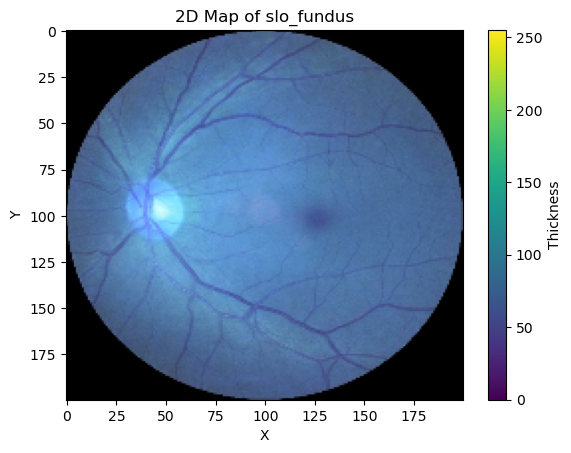

In [23]:
plot_2dmap(data['slo_fundus'])

# All data

In [33]:
flist = os.listdir(os.path.join(folder, 'train'))
flist

['1005_right.npz',
 '1006_left.npz',
 '1006_right.npz',
 '100_left.npz',
 '100_right.npz',
 '1010_left.npz',
 '1010_right.npz',
 '1011_left.npz',
 '1011_right.npz',
 '1012_left.npz',
 '1012_right.npz',
 '1013_left.npz',
 '1013_right.npz',
 '1015_left.npz',
 '1015_right.npz',
 '1016_left.npz',
 '1016_right.npz',
 '1018_right.npz',
 '1019_left.npz',
 '1019_right.npz',
 '101_left.npz',
 '101_right.npz',
 '1020_left.npz',
 '1022_left.npz',
 '1022_right.npz',
 '1024_left.npz',
 '1024_right.npz',
 '1028_left.npz',
 '1028_right.npz',
 '1032_left.npz',
 '1032_right.npz',
 '1033_right.npz',
 '1034_left.npz',
 '1034_right.npz',
 '1041_left.npz',
 '1041_right.npz',
 '1043_left.npz',
 '1043_right.npz',
 '1045_left.npz',
 '1045_right.npz',
 '1046_left.npz',
 '1046_right.npz',
 '1048_left.npz',
 '1048_right.npz',
 '1050_left.npz',
 '1050_right.npz',
 '1052_left.npz',
 '1052_right.npz',
 '1054_left.npz',
 '1054_right.npz',
 '1056_left.npz',
 '1056_right.npz',
 '1058_left.npz',
 '1058_right.npz',
 '10

In [45]:
len(flist)

4476

In [49]:
sample_data = np.load(os.path.join(folder, "train", flist[0]))
for k in sample_data.keys():
    print(k)

slo_fundus
race
male
hispanic
maritalstatus
language
dr_class
dr_subtype


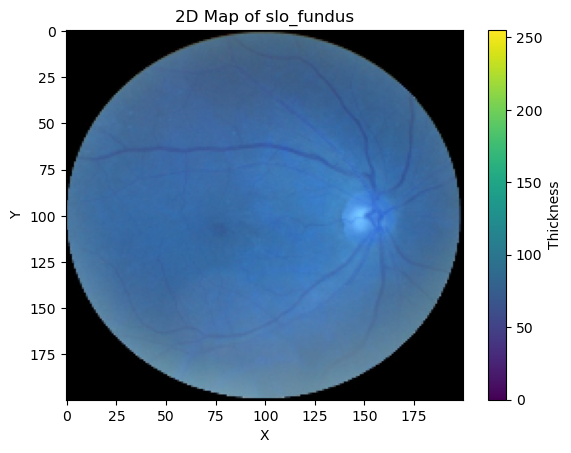

In [51]:
plot_2dmap(sample_data['slo_fundus'])

In [53]:
sample_data['slo_fundus'].shape

(200, 200, 3)

In [102]:
X = np.empty((8, 8, 8, 3), dtype=np.uint8)
y = np.empty(8, dtype=np.int32)
X, y

(array([[[[  1,   0,   0],
          [  0,   0,   0],
          [  0,   0, 128],
          ...,
          [  0, 191,   5],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 228],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[ 34,  34,  34],
          [ 10,  32,  32],
          [ 32,  32,  82],
          ...,
          [102,  32, 118],
          [ 97, 108, 117],
          [101, 115,  32]],
 
         ...,
 
         [[ 32, 111, 102],
          [ 32, 116, 104],
          [101,  32, 102],
          ...,
          [110,  32,  99],
          [111, 109, 101],
          [115,  32, 102]],
 
         [[114, 111, 109],
          [ 32, 116, 104],
          [101,  32,  97],
          ...,
          [ 32, 102, 111],
          [114,  32,  39],
          [112, 101,  97]],
 
         [[107,  32, 116],
          [111,  32, 112],
          [101,  97, 107],
   

In [122]:
img = cv2.resize(sample_data['slo_fundus'], (224,224))
img.ndim

3

In [126]:
X[i,] =  np.transpose(np.array([img, img, img]), (1, 2, 0))
#y[i] = sample_data['dr_class']

ValueError: axes don't match array

## Data loader

In [60]:
import tensorflow as tf
import random
import cv2

In [82]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, flist, data_path, batch_size=8, dim=(200,200), n_channels=3, shuffle=False):
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = flist
        self.data_path = data_path
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels), dtype=np.uint8)
        y = np.empty((self.batch_size), dtype=np.int32)
        for i, ID in enumerate(list_IDs_temp):
            data = np.load(os.path.join(self.data_path, ID))
            img = cv2.resize(data['slo_fundus'], (224,224))
            X[i,] =  np.transpose(np.array([img, img, img]), (1, 2, 0))
            y[i] = data['dr_class']

        return X, y

In [ ]:
## Data loader

In [84]:
image_folder = os.path.join(folder, 'train')

_generator = DataGenerator(flist, image_folder,
                           batch_size=4, dim=(200,200),
                           n_channels=3, shuffle=True)

In [72]:
_generator

In [96]:
imgs, labs = _generator.__getitem__(0)

ValueError: axes don't match array

In [76]:
len(imgs), labs

NameError: name 'imgs' is not defined

# Model Building